In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [2]:
# load data

df = pd.read_csv('train.csv')
pd.set_option('max_columns',None)

In [3]:
df.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,31715,current,M,41,723,30292.00,NaN,2679.49,NaN,17032.745,NaN,3.0,2.0,3.0,NaN,NaN,NaN,200000.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,60454.78,58341.0,10.0,4.0,54240.0,74507.12,80827.0,6.0,8.0,73729.0,60073.14,58057.0,4.0,10.0,53560.0,NaN,3083.69,12163
1,23099,current,M,41,523,9552.05,1867.67,3806.00,473.43,2234.000,793.0,2.0,5.0,3.0,2.0,2.0,5.0,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32652.47,33714.0,19.0,2.0,20000.0,17774.43,19674.0,2.0,8.0,11600.0,8739.36,7716.0,2.0,12.0,7600.0,NaN,3953.04,680
2,20982,current,M,36,864,6204.21,NaN,830.60,NaN,1353.750,NaN,14.0,5.0,2.0,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,200
3,455,current,M,38,349,40877.62,NaN,19729.60,NaN,30446.610,NaN,12.0,8.0,10.0,NaN,NaN,NaN,50000.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3203.25,25067.0,3.0,1.0,24795.0,24059.24,25003.0,1.0,2.0,24859.0,54018.52,55597.0,3.0,4.0,30000.0,NaN,4059.07,1676
4,20382,current,M,48,523,10046.00,NaN,6046.00,NaN,1151.400,NaN,2.0,4.0,21.0,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,1.0,1497586.08,NaN,50000.0,NaN,74823.50,41012.4,16.0,4.0,40000.0,91188.62,90567.5,7.0,15.0,50000.0,71310.50,130482.0,8.0,16.0,55000.0,NaN,5804.29,1603


In [4]:
df.shape

(24615, 44)

In [5]:
# Descriptive analysis on Data

df.describe()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,24615.000000,24615.000000,24615.000000,24615.000000,10276.000000,2.461500e+04,11595.000000,24615.000000,8678.000000,22847.000000,23756.000000,23437.000000,10276.000000,11595.000000,12955.000000,24609.000000,1992.0,633.0,2154.0,1221.0,1.040000e+03,1.724000e+03,9.960000e+02,302.000000,2.318900e+04,2.209500e+04,23279.000000,23279.000000,2.209500e+04,2.286200e+04,2.204800e+04,23041.000000,23041.000000,2.204800e+04,2.292000e+04,2.342900e+04,23443.000000,23443.000000,2.342900e+04,2.461500e+04,24615.000000
mean,16352.306602,35.910867,554.286289,16724.699679,5837.704149,1.449078e+04,5778.853761,9034.903220,4580.288176,9.195649,9.605910,12.328071,5.290483,6.260716,7.906523,121636.324150,1.0,1.0,1.0,1.0,8.689592e+05,1.782198e+05,4.161000e+04,5029.033214,7.088840e+04,7.637680e+04,14.893466,3.796555,4.687195e+04,6.777295e+04,7.998758e+04,4.093703,13.939716,4.980322e+04,7.775094e+04,7.605872e+04,5.789404,16.023546,4.509387e+04,1.051152e+04,6833.298639
std,9422.382515,8.350756,188.502571,25557.121858,12149.234942,2.428710e+04,15169.627917,15579.128037,9440.029274,11.449178,9.884521,11.908281,6.137896,7.317564,9.108924,123600.524542,0.0,0.0,0.0,0.0,4.829767e+06,4.699193e+05,9.336509e+04,6251.799722,1.798309e+05,1.948909e+05,11.598500,3.514741,1.305665e+05,2.030006e+05,2.096595e+05,3.885775,11.501255,1.252070e+05,3.080153e+05,2.981304e+05,4.749826,13.415936,1.274878e+05,3.009496e+05,12689.409718
min,0.000000,22.000000,123.000000,233.970000,10.010000,1.030000e+02,20.000000,51.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,2.000000e-02,3.590000e+00,0.000000e+00,-12179.000000,4.010000e+00,3.432000e+01,0.000000,0.000000,1.800000e-01,1.500000e-01,1.061000e+01,0.000000,0.000000,1.500000e-01,5.230000e+00,1.300000e+01,0.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,8182.500000,31.000000,425.000000,3707.050000,844.487500,2.981930e+03,797.000000,1626.000000,740.000000,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,45000.000000,1.0,1.0,1.0,1.0,5.031000e+03,3.500000e+04,7.444000e+03,977.000000,2.231772e+04,2.533200e+04,6.000000,2.000000,1.800000e+04,2.005925e+04,2.453975e+04,2.000000,6.000000,1.809474e+04,2.518399e+04,2.310900e+04,3.000000,6.000000,1.600000e+04,0.000000e+00,1275.500000
50%,16339.000000,34.000000,575.000000,8911.300000,2294.320000,7.338500e+03,2132.000000,4153.000000,1823.000000,7.000000,7.000000,9.000000,3.000000,4.000000,5.000000,75000.000000,1.0,1.0,1.0,1.0,3.218960e+04,8.500000e+04,2.500000e+04,5439.000000,4.113080e+04,4.399700e+04,12.000000,3.000000,2.804900e+04,3.821506e+04,4.527949e+04,3.000000,11.000000,3.000000e+04,4.616739e+04,4.313000e+04,5.000000,13.000000,2.685405e+04,1.676600e+02,3118.000000
75%,24435.500000,39.000000,683.000000,19896.860000,6163.252500,1.694145e+04,5651.095000,10224.570000,4558.000000,12.000000,13.000000,17.000000,7.000000,8.000000,10.000000,145000.000000,1.0,1.0,1.0,1.0,1.716245e+05,1.774847e+05,5.000000e+04,6885.000000,7.513563e+04,7.945350e+04,20.000000,5.000000,4.800000e+04,7.382796e+04,8.933325e+04,5.000000,19.000000,5.000000e+04,8.424984e+04,8.061868e+04,7.000000,22.000000,4.680320e+04,4.187245e+03,7310.000000
max,32820.000000,224.000000,977.000000,804712.580000,366223.160000,1.117246e+06,911223.490000,382914.100000,167311.000000,1012.000000,601.000000,653.000000,82.000000,97.000000,104.000000,1000000.000000,1.0,1.0,1.0,1.0,8.445222e+07,1.36

### EDA

In [6]:
df.info()  # Checking Data type present in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24615 entries, 0 to 24614
Data columns (total 44 columns):
id                       24615 non-null int64
account_type             24615 non-null object
gender                   24615 non-null object
age                      24615 non-null int64
region_code              24615 non-null int64
cc_cons_apr              24615 non-null float64
dc_cons_apr              10276 non-null float64
cc_cons_may              24615 non-null float64
dc_cons_may              11595 non-null float64
cc_cons_jun              24615 non-null float64
dc_cons_jun              8678 non-null float64
cc_count_apr             22847 non-null float64
cc_count_may             23756 non-null float64
cc_count_jun             23437 non-null float64
dc_count_apr             10276 non-null float64
dc_count_may             11595 non-null float64
dc_count_jun             12955 non-null float64
card_lim                 24609 non-null float64
personal_loan_active     1992 non-nu

In [7]:
df = df.fillna(np.nan)

In [8]:
df.isnull().sum()  # Checking null value count

id                           0
account_type                 0
gender                       0
age                          0
region_code                  0
cc_cons_apr                  0
dc_cons_apr              14339
cc_cons_may                  0
dc_cons_may              13020
cc_cons_jun                  0
dc_cons_jun              15937
cc_count_apr              1768
cc_count_may               859
cc_count_jun              1178
dc_count_apr             14339
dc_count_may             13020
dc_count_jun             11660
card_lim                     6
personal_loan_active     22623
vehicle_loan_active      23982
personal_loan_closed     22461
vehicle_loan_closed      23394
investment_1             23575
investment_2             22891
investment_3             23619
investment_4             24313
debit_amount_apr          1426
credit_amount_apr         2520
debit_count_apr           1336
credit_count_apr          1336
max_credit_amount_apr     2520
debit_amount_may          1753
credit_a

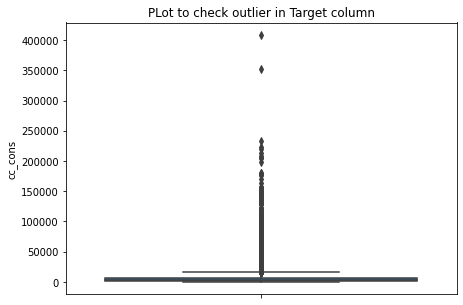

In [9]:
# Checking outlier in Target column

plt.figure(figsize=[7,5])
sns.boxplot(y=df['cc_cons'])
plt.title('PLot to check outlier in Target column')
plt.show()

In [10]:
df = df[df['cc_cons']<12000]  # Dropping outliers

In [11]:
df.shape  # Shape of Data after dropping outliers

(21097, 44)

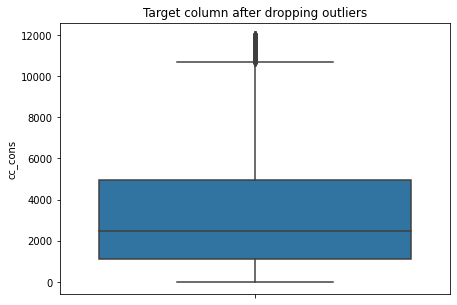

In [12]:
plt.figure(figsize=[7,5])
sns.boxplot(y=df['cc_cons'])
plt.title('Target column after dropping outliers')
plt.show()

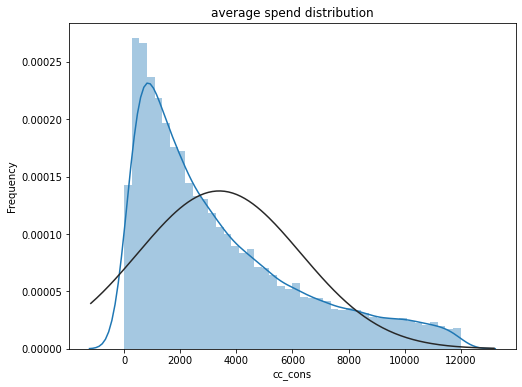

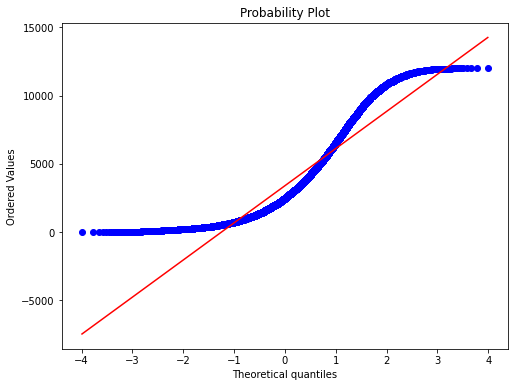

In [13]:
# Plotting distribution of Target column to check for skewness

from scipy import stats
from scipy.stats import norm, skew #for some statistics

plt.figure(figsize=[8,6])
sns.distplot(df['cc_cons'] , fit=norm)

#Now plot the distribution
plt.ylabel('Frequency')
plt.title('average spend distribution')
plt.show()

#Get also the QQ-plot
fig = plt.figure(figsize=[8,6])
res = stats.probplot(df['cc_cons'], plot=plt)
plt.show()

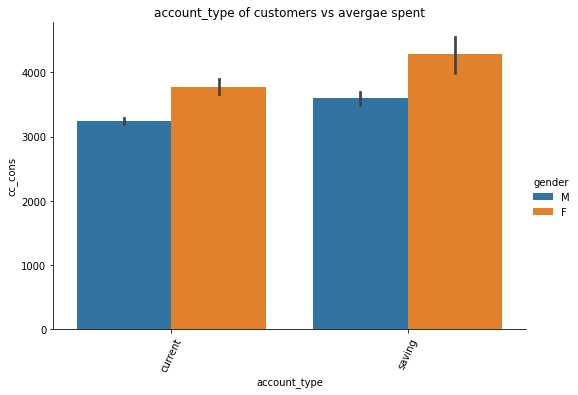

In [14]:
chart = sns.catplot(y='cc_cons' ,x='account_type', data=df , hue='gender',kind='bar', height=5, aspect=1.5)
chart.set_xticklabels(rotation=65)
plt.title('account_type of customers vs avergae spent')
plt.show()


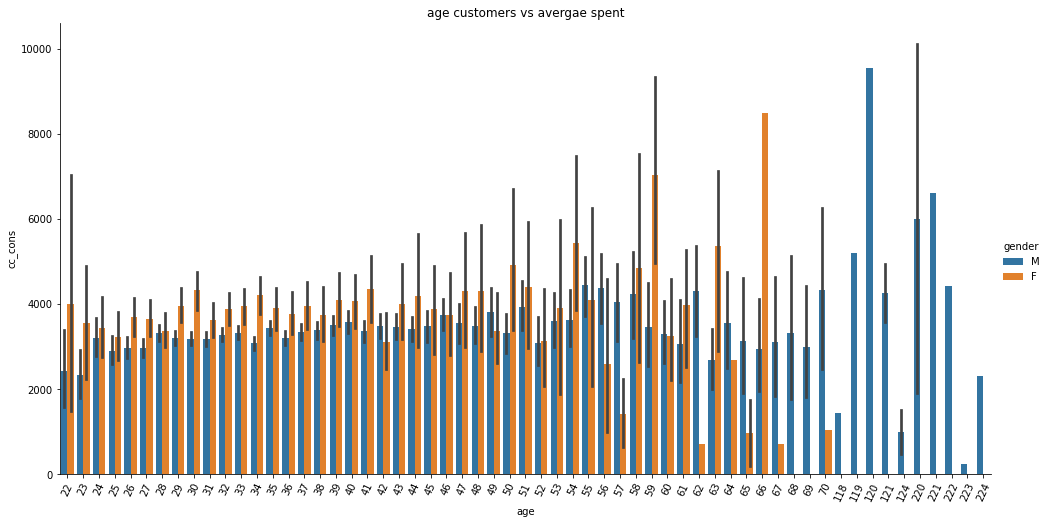

In [15]:
chart = sns.catplot(y='cc_cons' ,x='age', data=df , hue='gender',kind='bar', height=7, aspect=2)
chart.set_xticklabels(rotation=65)
plt.title('age customers vs avergae spent')
plt.show()

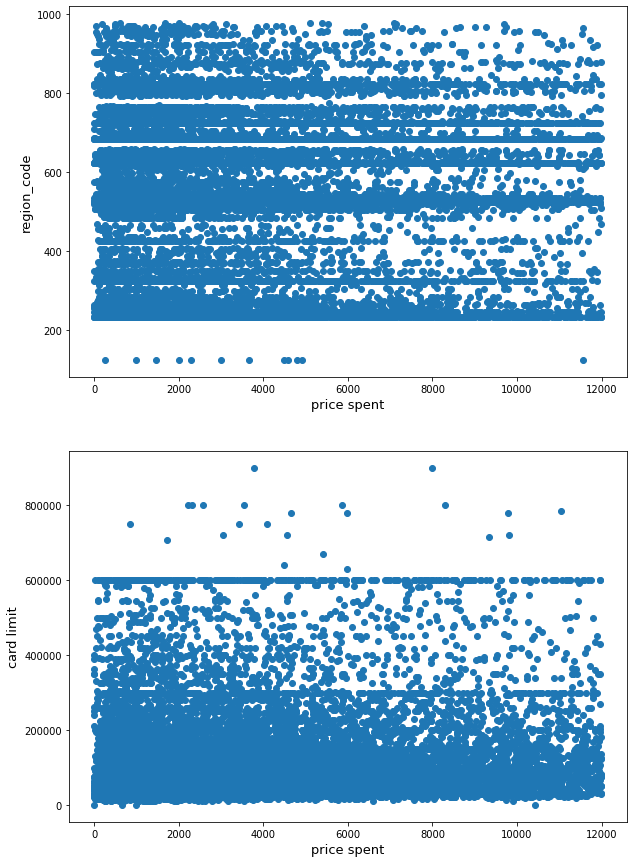

In [16]:
fig, axes = plt.subplots(2, figsize=(10, 15))
axes[0].scatter(x = df['cc_cons'], y = df['region_code'])
axes[0].set_ylabel('region_code', fontsize=13)
axes[0].set_xlabel('price spent', fontsize=13)

axes[1].scatter(x = df['cc_cons'], y = df['card_lim'])
axes[1].set_ylabel('card limit', fontsize=13)
axes[1].set_xlabel('price spent', fontsize=13)

plt.show()

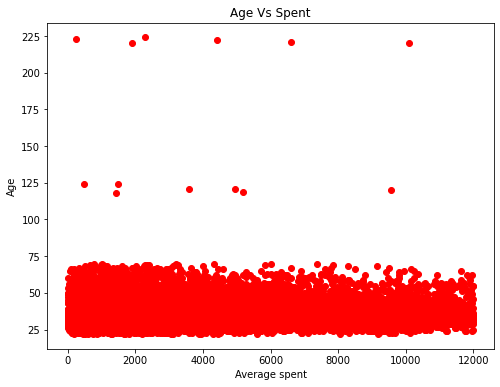

In [17]:
plt.figure(figsize=[8,6])
plt.scatter(x=df['cc_cons'],y=df['age'],color='red')
plt.xlabel('Average spent')
plt.ylabel('Age')
plt.title('Age Vs Spent')
plt.show()

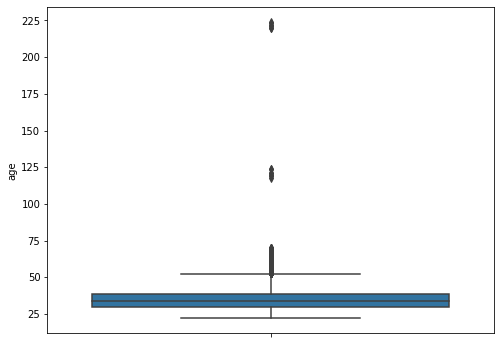

In [18]:
# Removing outlier in Age column

plt.figure(figsize=[8,6])
sns.boxplot(df['age'],orient ="v")
plt.show()

In [19]:
# Imputing outlier in age column with median

age_mean = df['age'].quantile(0.5)
age_upper = df['age'].quantile(0.95)
print(age_mean)
print(age_upper)



34.0
50.0


In [20]:
df['age'] = np.where(df['age']>age_upper, age_mean,df['age'])

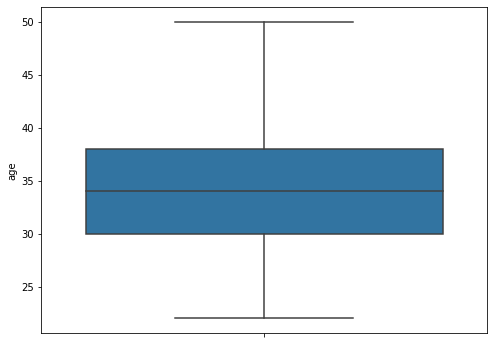

In [21]:
plt.figure(figsize=[8,6])
sns.boxplot(df['age'],orient ="v")
plt.show()

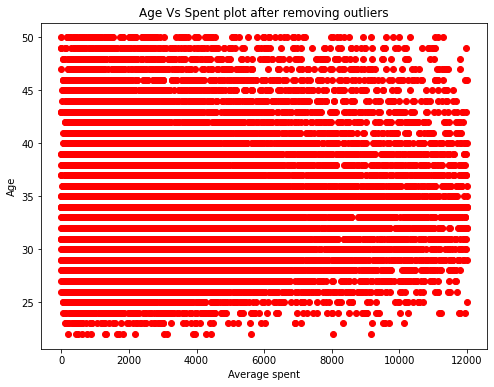

In [22]:
plt.figure(figsize=[8,6])
plt.scatter(x=df['cc_cons'],y=df['age'],color='red')
plt.xlabel('Average spent')
plt.ylabel('Age')
plt.title('Age Vs Spent plot after removing outliers')
plt.show()

In [23]:
df.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
1,23099,current,M,41.0,523,9552.05,1867.67,3806.00,473.43,2234.00,793.0,2.0,5.0,3.0,2.0,2.0,5.0,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32652.47,33714.00,19.0,2.0,20000.0,17774.43,19674.0,2.0,8.0,11600.0,8739.36,7716.0,2.0,12.0,7600.0,NaN,3953.04,680
2,20982,current,M,36.0,864,6204.21,NaN,830.60,NaN,1353.75,NaN,14.0,5.0,2.0,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,200
3,455,current,M,38.0,349,40877.62,NaN,19729.60,NaN,30446.61,NaN,12.0,8.0,10.0,NaN,NaN,NaN,50000.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3203.25,25067.00,3.0,1.0,24795.0,24059.24,25003.0,1.0,2.0,24859.0,54018.52,55597.0,3.0,4.0,30000.0,NaN,4059.07,1676
4,20382,current,M,48.0,523,10046.00,NaN,6046.00,NaN,1151.40,NaN,2.0,4.0,21.0,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,1.0,1497586.08,NaN,50000.0,NaN,74823.50,41012.40,16.0,4.0,40000.0,91188.62,90567.5,7.0,15.0,50000.0,71310.50,130482.0,8.0,16.0,55000.0,NaN,5804.29,1603
5,14546,current,M,31.0,523,18785.12,2708.87,9773.09,NaN,7253.00,NaN,17.0,13.0,18.0,3.0,NaN,1.0,270000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,196201.98,202440.69,24.0,12.0,50552.0,1295538.75,1315405.0,4.0,13.0,1254000.0,3035812.04,3017777.0,6.0,11.0,2952325.0,NaN,19931.00,11960


### Imputation begins


In [24]:
# check for rows to confirm if null values are present at same rows where debit card spent and debit card tranactions for April month is zero

z = df[(df['dc_cons_apr'].isnull()) & (df['dc_count_apr'].isnull())]
y = z[['dc_cons_apr','dc_count_apr']]
y

,dc_cons_apr,dc_count_apr
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
7,NaN,NaN
10,NaN,NaN
...,...,...
24608,NaN,NaN
24609,NaN,NaN
24610,NaN,NaN
24612,NaN,NaN


In [25]:
z = df[(df['dc_cons_may'].isnull()) & (df['dc_count_may'].isnull())]

y= z[['dc_cons_may','dc_count_may']]
y

,dc_cons_may,dc_count_may
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
7,NaN,NaN
...,...,...
24608,NaN,NaN
24609,NaN,NaN
24610,NaN,NaN
24612,NaN,NaN


In [26]:
# Imputing values with 0 for debit card spent and debit card transaction count

df[['dc_cons_may','dc_count_may']] = np.where(df[['dc_cons_may','dc_count_may']].isnull(),0,df[['dc_cons_may','dc_count_may']])
df[['dc_cons_apr','dc_count_apr']] = np.where(df[['dc_cons_apr','dc_count_apr']].isnull(),0,df[['dc_cons_apr','dc_count_apr']])
df[['dc_cons_jun','dc_count_jun']] = np.where(df[['dc_cons_jun','dc_count_jun']].isnull(),0,df[['dc_cons_jun','dc_count_jun']])


In [27]:
# Imputing credit card transaction count with mode

df['cc_count_apr'] = df['cc_count_apr'].fillna(df['cc_count_apr'].mode()[0])
df['cc_count_may'] = df['cc_count_may'].fillna(df['cc_count_may'].mode()[0])
df['cc_count_jun'] = df['cc_count_jun'].fillna(df['cc_count_jun'].mode()[0])

In [28]:
# Imputing 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed','vehicle_loan_closed', 'investment_1',
#       'investment_2', 'investment_3','investment_4' with 0 value.

cols = ['personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4']

for i in cols:
    df[i] = df[i].fillna(0)

In [29]:
# Imputing below columns with 0

col_3 = ['credit_amount_apr','debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
        'credit_amount_may', 'credit_count_may','debit_count_may', 'max_credit_amount_may', 
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun']

for i in col_3:
    df[i] = df[i].fillna(0)

In [30]:
# Imputing Card_limit and Loan_enq rows with 0. also replacing Sting value with int value for Loan enquiry column

df['loan_enq'] = df['loan_enq'].fillna(0)
df['card_lim'] = df['card_lim'].fillna(0)
df['loan_enq'] = df['loan_enq'].replace({'Y':1})

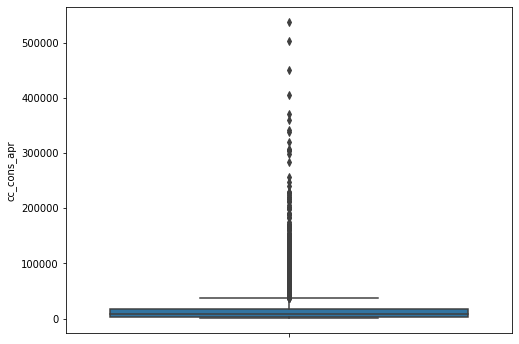

In [31]:
plt.figure(figsize=[8,6])
sns.boxplot(df['cc_cons_apr'],orient ="v")
plt.show()

In [32]:
credit_spend_april_50 = df['cc_cons_apr'].quantile(0.5)
credit_spend_april_95 = df['cc_cons_apr'].quantile(0.95)
print(credit_spend_april_50)
print(credit_spend_april_95)

8001.08
46956.000000000044


In [33]:
# Imputing outlier with mean value

df['cc_cons_apr'] = np.where(df['cc_cons_apr']>credit_spend_april_95, credit_spend_april_50,df['cc_cons_apr'])


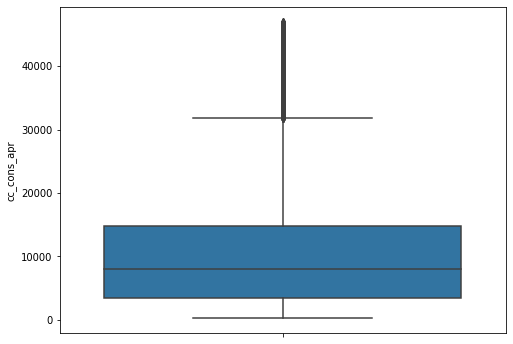

In [34]:
plt.figure(figsize=[8,6])
sns.boxplot(df['cc_cons_apr'],orient ="v")
plt.show()

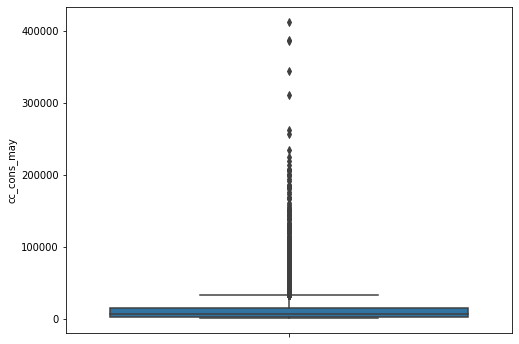

In [35]:
plt.figure(figsize=[8,6])
sns.boxplot(df['cc_cons_may'],orient ="v")
plt.show()

In [36]:
credit_spend_may_50 = df['cc_cons_may'].quantile(0.5)
credit_spend_may_95 = df['cc_cons_may'].quantile(0.95)
print(credit_spend_may_50)
print(credit_spend_may_95)

6554.2
40503.108000000015


In [37]:
# Imputing outlier for spent in may with medain value

df['cc_cons_may'] = np.where(df['cc_cons_may']>credit_spend_may_95, credit_spend_may_50,df['cc_cons_may'])


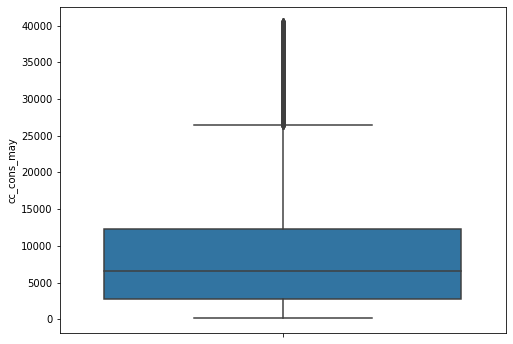

In [38]:
plt.figure(figsize=[8,6])
sns.boxplot(df['cc_cons_may'],orient ="v")
plt.show()

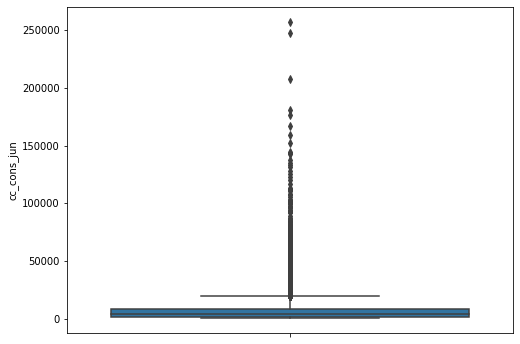

In [39]:
plt.figure(figsize=[8,6])
sns.boxplot(df['cc_cons_jun'],orient ="v")
plt.show()

In [40]:
credit_spend_june_50 = df['cc_cons_jun'].quantile(0.5)
credit_spend_june_95 = df['cc_cons_jun'].quantile(0.95)
print(credit_spend_june_50)
print(credit_spend_june_95)

# Imputing outlier for spent in june with medain value

df['cc_cons_jun'] = np.where(df['cc_cons_jun']>credit_spend_june_95, credit_spend_june_50,df['cc_cons_jun'])

3669.06
25555.716000000022


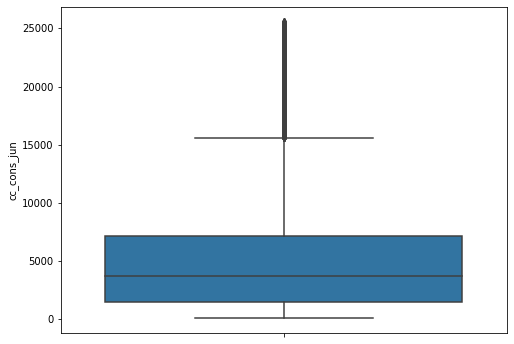

In [41]:
plt.figure(figsize=[8,6])
sns.boxplot(df['cc_cons_jun'],orient ="v")
plt.show()

In [42]:
# Imputing below columns with 0
col_2 =['debit_amount_apr','debit_amount_may','debit_amount_jun']

for i in col_2:
    df[i] = df[i].fillna(0)

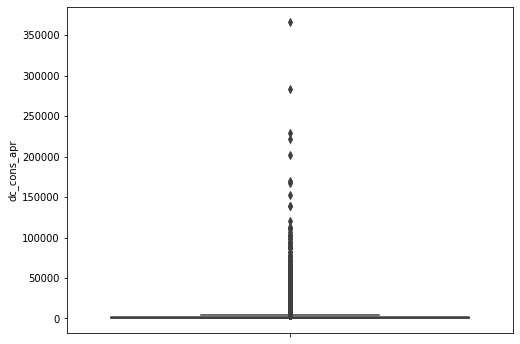

In [43]:
plt.figure(figsize=[8,6])
sns.boxplot(df['dc_cons_apr'],orient ="v")
plt.show()

In [44]:
# Imputing debit card spent for april with median

debit_spend_apr_50 = df['dc_cons_apr'].quantile(0.5)
debit_spend_apr_95 = df['dc_cons_apr'].quantile(0.95)


df['dc_cons_apr'] = np.where(df['dc_cons_apr']>debit_spend_apr_95, debit_spend_apr_50,df['dc_cons_apr'])


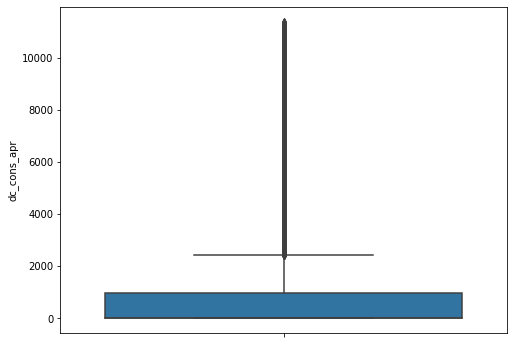

In [45]:
plt.figure(figsize=[8,6])
sns.boxplot(df['dc_cons_apr'],orient ="v")
plt.show()

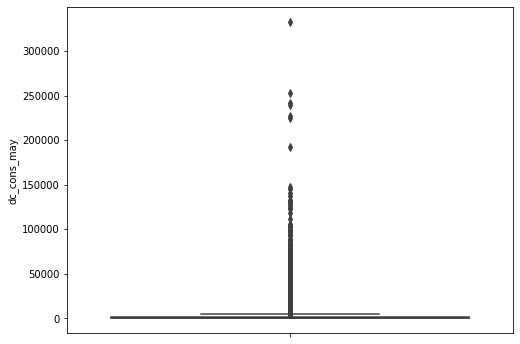

In [46]:
plt.figure(figsize=[8,6])
sns.boxplot(df['dc_cons_may'],orient ="v")
plt.show()

In [47]:
# Imputing debit card spent for may with median

debit_spend_may_50 = df['dc_cons_may'].quantile(0.5)
debit_spend_may_95 = df['dc_cons_may'].quantile(0.95)


df['dc_cons_may'] = np.where(df['dc_cons_may']>debit_spend_may_95, debit_spend_may_50,df['dc_cons_may'])


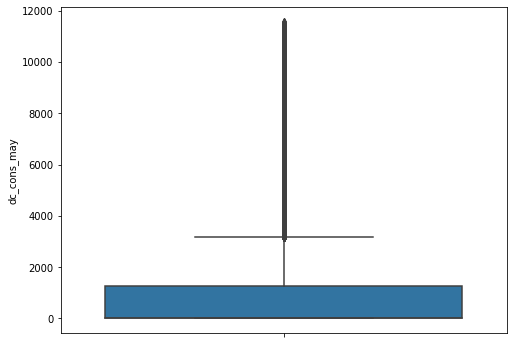

In [48]:
plt.figure(figsize=[8,6])
sns.boxplot(df['dc_cons_may'],orient ="v")
plt.show()

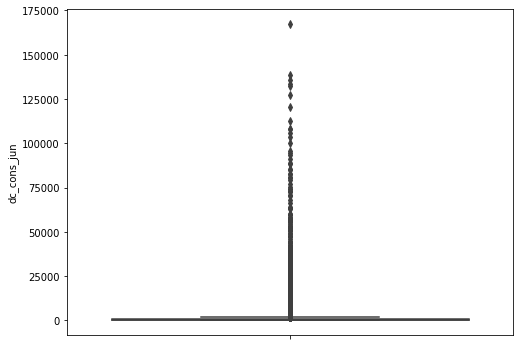

In [49]:
plt.figure(figsize=[8,6])
sns.boxplot(df['dc_cons_jun'],orient ="v")
plt.show()

In [50]:
# Imputing debit card spent for june with median

debit_spend_june_50 = df['dc_cons_jun'].quantile(0.5)
debit_spend_june_95 = df['dc_cons_jun'].quantile(0.95)


df['dc_cons_jun'] = np.where(df['dc_cons_jun']>debit_spend_june_95, debit_spend_june_50,df['dc_cons_jun'])


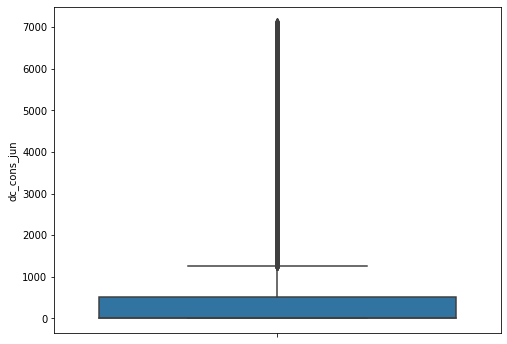

In [51]:
plt.figure(figsize=[8,6])
sns.boxplot(df['dc_cons_jun'],orient ="v")
plt.show()

In [52]:
df = pd.get_dummies(df, columns=['gender','account_type'], drop_first=True)

In [53]:
df.head()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,gender_M,account_type_saving
1,23099,41.0,523,9552.05,1867.67,3806.00,473.43,2234.00,793.0,2.0,5.0,3.0,2.0,2.0,5.0,16000.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,32652.47,33714.00,19.0,2.0,20000.0,17774.43,19674.0,2.0,8.0,11600.0,8739.36,7716.0,2.0,12.0,7600.0,0,3953.04,680,1,0
2,20982,36.0,864,6204.21,0.00,830.60,0.00,1353.75,0.0,14.0,5.0,2.0,0.0,0.0,0.0,30000.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0.00,200,1,0
3,455,38.0,349,40877.62,0.00,19729.60,0.00,3669.06,0.0,12.0,8.0,10.0,0.0,0.0,0.0,50000.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,3203.25,25067.00,3.0,1.0,24795.0,24059.24,25003.0,1.0,2.0,24859.0,54018.52,55597.0,3.0,4.0,30000.0,0,4059.07,1676,1,0
4,20382,48.0,523,10046.00,0.00,6046.00,0.00,1151.40,0.0,2.0,4.0,21.0,0.0,0.0,0.0,300000.0,0.0,0.0,0.0,1.0,1497586.08,0.0,50000.0,0.0,74823.50,41012.40,16.0,4.0,40000.0,91188.62,90567.5,7.0,15.0,50000.0,71310.50,130482.0,8.0,16.0,55000.0,0,5804.29,1603,1,0
5,14546,31.0,523,18785.12,2708.87,9773.09,0.00,7253.00,0.0,17.0,13.0,18.0,3.0,0.0,1.0,270000.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,196201.98,202440.69,24.0,12.0,50552.0,1295538.75,1315405.0,4.0,13.0,1254000.0,3035812.04,3017777.0,6.0,11.0,2952325.0,0,19931.00,11960,1,0


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.drop(['id','cc_cons'],1))

In [55]:
dff = pd.DataFrame(df_scaled, columns = [ 'age', 'region_code', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'gender_M', 'account_type_saving'])

<AxesSubplot:>

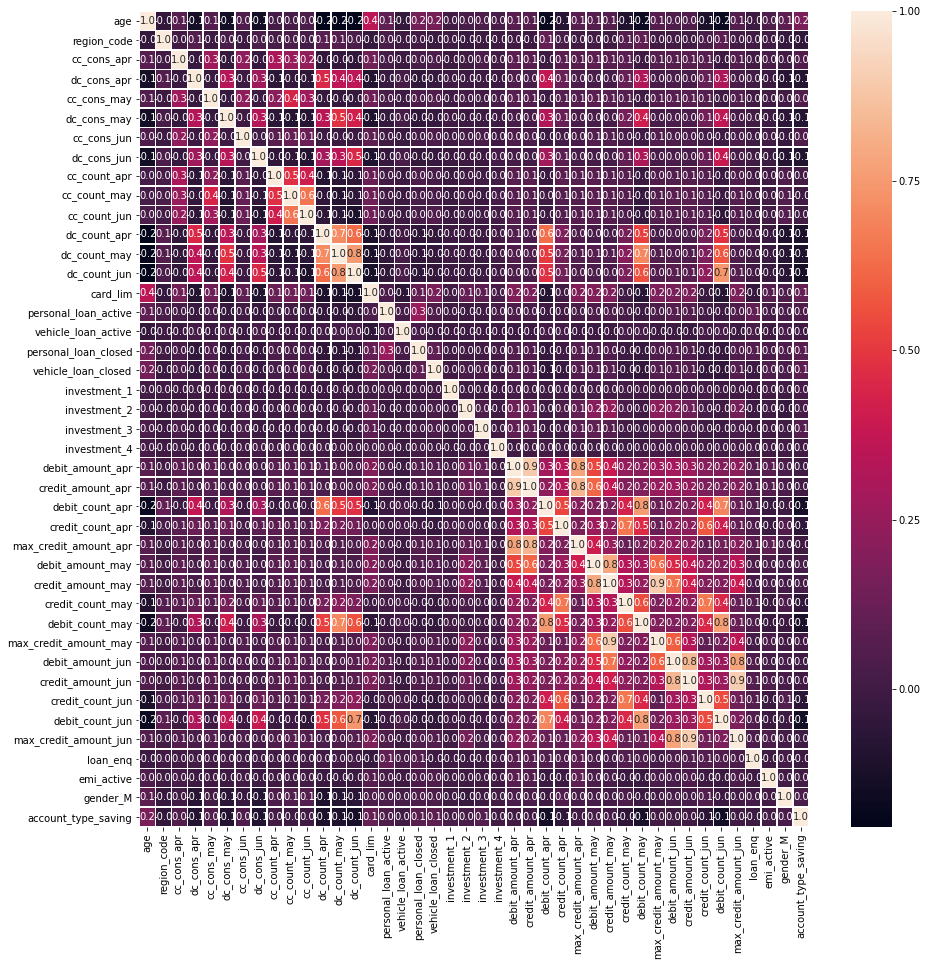

In [56]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dff.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [57]:
dff = dff.drop(['debit_amount_apr', 'credit_amount_apr', 'debit_count_apr','credit_count_apr','max_credit_amount_jun'],1)

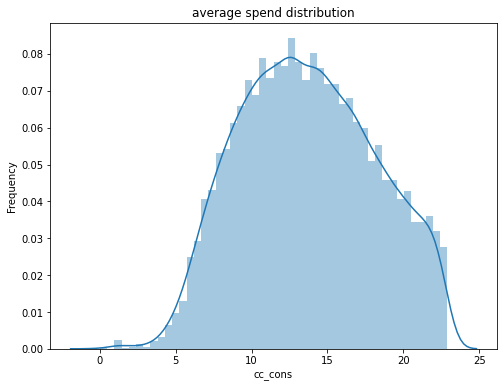

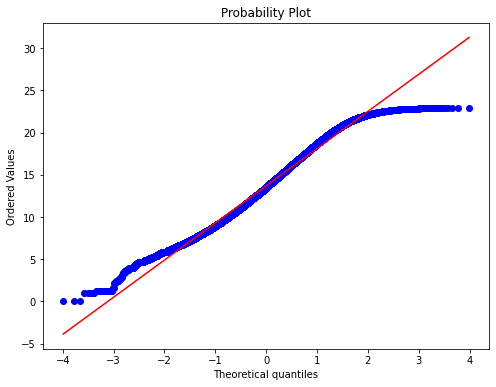

In [58]:
# correcting skewness by taking cube root of Target column

df['cc_cons'] = np.cbrt(df['cc_cons'])

#Check the new distribution
plt.figure(figsize=[8,6])
sns.distplot(df['cc_cons'])

plt.ylabel('Frequency')
plt.title('average spend distribution')

#Get also the QQ-plot
fig = plt.figure(figsize=[8,6])
res = stats.probplot(df['cc_cons'], plot=plt)
plt.show()

### Model Building 

In [59]:
X = dff[:]
y = df['cc_cons']

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=3)

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error

rmse_val = [] #to store rmse values for different k
for K in range(15):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    rmsle = mean_squared_log_error(y_test,pred) #calculate rmse
    rmse_val.append(rmsle) #store rmse values
    print('RMSE value for k= ' , K , 'is:', rmsle)

RMSE value for k=  1 is: 0.19597033808825992
RMSE value for k=  2 is: 0.14264155137798482
RMSE value for k=  3 is: 0.12749032848446204
RMSE value for k=  4 is: 0.12058492633562874
RMSE value for k=  5 is: 0.11668743047432002
RMSE value for k=  6 is: 0.11390035047849408
RMSE value for k=  7 is: 0.11155126639853524
RMSE value for k=  8 is: 0.10977284008407796
RMSE value for k=  9 is: 0.10837982510100727
RMSE value for k=  10 is: 0.10793881157778862
RMSE value for k=  11 is: 0.10664147900103706
RMSE value for k=  12 is: 0.10598181354136427
RMSE value for k=  13 is: 0.1054698818891574
RMSE value for k=  14 is: 0.10514257238151664
RMSE value for k=  15 is: 0.10461630547932955


<AxesSubplot:>

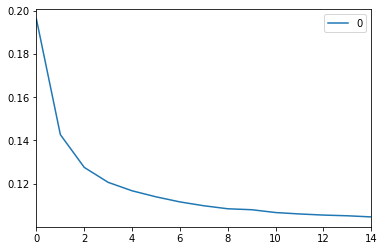

In [62]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

lmodel = LinearRegression()
lmodel.fit(X_train, y_train)

linearmo = lmodel.predict(X_test)
lrmse = mean_squared_log_error(y_test, linearmo)
print(lrmse)


0.1003623556433505


In [64]:
rf_clf1 = RandomForestRegressor(max_depth=3, random_state=2)
rf_clf1.fit(X_train, y_train)

prediction1 = rf_clf1.predict(X_test)


rmse_rd = mean_squared_log_error(y_test, prediction1)

print(rmse_rd)

0.10081728733787973


In [65]:
model = KNeighborsRegressor(n_neighbors = 10)

model.fit(X_train, y_train)
pred=model.predict(X_test)
rmsle_val = mean_squared_log_error(y_test,pred)
print(rmsle_val)

0.10793881157778862


In [66]:
#Trying XGBoost

import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [300]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

XGBPred = xgb_grid.predict(X_test)
XGB_rmsle = mean_squared_log_error(XGBPred, y_test)
print(XGB_rmsle)


Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   45.2s finished
C:\Users\Abhineet\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.09592818705780543


<AxesSubplot:xlabel='cc_cons'>

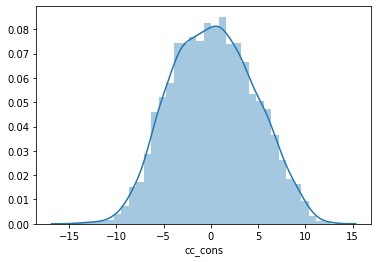

In [67]:
residuals=y_test-pred
sns.distplot(residuals)

### Test data 

In [68]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,16174,current,M,40,324,32205.49,NaN,13836.470,NaN,17693.000,NaN,31.0,19.0,60.0,NaN,NaN,NaN,500000.0,NaN,NaN,NaN,NaN,10827.5,NaN,NaN,NaN,74375.51,68596.00,10.0,1.0,68309.0,74164.80,78397.00,2.0,10.0,68309.0,73432.40,103856.00,3.0,13.0,68409.0,NaN,0.00
1,19966,current,M,31,344,12059.40,759.00,2839.640,NaN,4923.220,NaN,7.0,10.0,18.0,2.0,NaN,NaN,65000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38372.01,31431.00,10.0,2.0,29264.0,13554.05,1198.00,1.0,4.0,1000.0,21272.83,10349.00,2.0,8.0,10000.0,NaN,0.00
2,18105,saving,M,40,534,10832.31,NaN,8198.155,NaN,4299.000,NaN,6.0,NaN,5.0,NaN,NaN,2.0,131000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20047.00,20334.88,1.0,2.0,20000.0,50068.00,66321.23,5.0,2.0,50000.0,39504.00,30389.58,4.0,7.0,20000.0,NaN,6026.40
3,1201,saving,M,34,923,17459.00,976.01,13186.500,NaN,7657.000,NaN,1.0,NaN,4.0,2.0,NaN,2.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6002.76,22145.00,9.0,2.0,20000.0,22779.00,4632.00,1.0,5.0,4500.0,2500.00,368.00,1.0,4.0,123.0,NaN,0.00
4,1595,current,M,35,523,870.59,13448.31,25143.960,5385.0,13515.775,NaN,2.0,10.0,4.0,4.0,6.0,3.0,364000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138469.08,111489.59,43.0,10.0,29284.0,66058.81,67242.54,15.0,34.0,29284.0,148340.26,164152.72,12.0,38.0,50000.0,NaN,7482.42


In [69]:
test_df =test_df.fillna(np.nan)

age_mean = test_df['age'].quantile(0.5)
age_upper = test_df['age'].quantile(0.95)

test_df['age'] = np.where(test_df['age']>age_upper, age_mean,test_df['age'])

# Imputing values with 0 for debit card spent and debit card transaction count

test_df[['dc_cons_may','dc_count_may']] = np.where(test_df[['dc_cons_may','dc_count_may']].isnull(),0,test_df[['dc_cons_may','dc_count_may']])
test_df[['dc_cons_apr','dc_count_apr']] = np.where(test_df[['dc_cons_apr','dc_count_apr']].isnull(),0,test_df[['dc_cons_apr','dc_count_apr']])
test_df[['dc_cons_jun','dc_count_jun']] = np.where(test_df[['dc_cons_jun','dc_count_jun']].isnull(),0,test_df[['dc_cons_jun','dc_count_jun']])

# Imputing credit card transaction count with mode

test_df['cc_count_apr'] = test_df['cc_count_apr'].fillna(test_df['cc_count_apr'].mode()[0])
test_df['cc_count_may'] = test_df['cc_count_may'].fillna(test_df['cc_count_may'].mode()[0])
test_df['cc_count_jun'] = test_df['cc_count_jun'].fillna(test_df['cc_count_jun'].mode()[0])

# Imputing 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed','vehicle_loan_closed', 'investment_1',
#       'investment_2', 'investment_3','investment_4' with 0.

cols = ['personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4']

for i in cols:
    test_df[i] = test_df[i].fillna(0)
    

# Imputing below columns with 0

col_3 = ['credit_amount_apr','debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
        'credit_amount_may', 'credit_count_may','debit_count_may', 'max_credit_amount_may', 
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun']

for i in col_3:
    test_df[i] = test_df[i].fillna(test_df[i].mode()[0])
    
# Imputing Card_limit and Loan_enq rows with 0. also replacing Sting value with int value for Loan enquiry column

test_df['loan_enq'] = test_df['loan_enq'].fillna(0)
test_df['card_lim'] = test_df['card_lim'].fillna(0)
test_df['loan_enq'] = test_df['loan_enq'].replace({'Y':1})


# Imputing outlier with median value

credit_spend_april_50 = test_df['cc_cons_apr'].quantile(0.5)
credit_spend_april_95 = test_df['cc_cons_apr'].quantile(0.95)
test_df['cc_cons_apr'] = np.where(test_df['cc_cons_apr']>credit_spend_april_95, credit_spend_april_50,test_df['cc_cons_apr'])


# Imputing outlier for spent in april with median value

credit_spend_may_50 = test_df['cc_cons_may'].quantile(0.5)
credit_spend_may_95 = test_df['cc_cons_may'].quantile(0.95)

test_df['cc_cons_may'] = np.where(test_df['cc_cons_may']>credit_spend_may_95, credit_spend_may_50,test_df['cc_cons_may'])


# Imputing outlier for spent in june with median value

credit_spend_june_50 = test_df['cc_cons_jun'].quantile(0.5)
credit_spend_june_95 = test_df['cc_cons_jun'].quantile(0.95)


test_df['cc_cons_jun'] = np.where(test_df['cc_cons_jun']>credit_spend_june_95, credit_spend_june_50,test_df['cc_cons_jun'])

# Imputing below columns with 0
col_2 =['debit_amount_apr','debit_amount_may','debit_amount_jun']

for i in col_2:
    test_df[i] = test_df[i].fillna(0)
    
# Imputing debit card spent for april with median

debit_spend_apr_50 =test_df['dc_cons_apr'].quantile(0.5)
debit_spend_apr_95 = test_df['dc_cons_apr'].quantile(0.95)

test_df['dc_cons_apr'] = np.where(test_df['dc_cons_apr']>debit_spend_apr_95, debit_spend_apr_50,test_df['dc_cons_apr'])


# Imputing debit card spent for may with median

debit_spend_may_50 = test_df['dc_cons_may'].quantile(0.5)
debit_spend_may_95 = test_df['dc_cons_may'].quantile(0.95)

test_df['dc_cons_may'] = np.where(test_df['dc_cons_may']>debit_spend_may_95, debit_spend_may_50,test_df['dc_cons_may'])


# Imputing debit card spent for june with median

debit_spend_june_50 = test_df['dc_cons_jun'].quantile(0.5)
debit_spend_june_95 = test_df['dc_cons_jun'].quantile(0.95)


test_df['dc_cons_jun'] = np.where(test_df['dc_cons_jun']>debit_spend_june_95, debit_spend_june_50,test_df['dc_cons_jun'])



test_df = pd.get_dummies(test_df, columns=['gender','account_type'], drop_first=True)

test_scaled = scaler.fit_transform(test_df.drop('id',1))

test_dff = pd.DataFrame(test_scaled, columns = [ 'age', 'region_code', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active', 'gender_M', 'account_type_saving'])



In [70]:
test_dff.head()

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,gender_M,account_type_saving
0,0.904189,-1.241234,1.737688,-0.486445,0.350632,-0.524274,1.808963,-0.444294,2.671392,1.121881,4.392051,-0.460551,-0.489940,-0.527705,3.123343,-0.317181,-0.163253,-0.312269,-0.22757,-0.029748,-0.12323,-0.118435,-0.073055,0.104905,0.024570,-0.402866,-0.809442,0.385314,0.115751,0.040376,-0.532280,-0.322051,0.143531,0.003095,0.099039,-0.574561,-0.194935,0.258460,-0.146327,-0.144518,0.412274,-0.519167
1,-0.660277,-1.134488,-0.013326,-0.141903,-0.740472,-0.524274,-0.191273,-0.444294,-0.170680,0.107738,0.565107,-0.040962,-0.489940,-0.527705,-0.463973,-0.317181,-0.163253,-0.312269,-0.22757,-0.045798,-0.12323,-0.118435,-0.073055,-0.247004,-0.318288,-0.402866,-0.508091,-0.206059,-0.406426,-0.408437,-0.806216,-0.864607,-0.368526,-0.159152,-0.190886,-0.796765,-0.577503,-0.327981,-0.146327,-0.144518,0.412274,-0.519167
2,0.904189,-0.120401,-0.119979,-0.486445,-0.208801,-0.524274,-0.289050,-0.444294,-0.289100,-0.906404,-0.619423,-0.460551,-0.489940,-0.275759,0.080309,-0.317181,-0.163253,-0.312269,-0.22757,-0.045798,-0.12323,-0.118435,-0.073055,-0.426118,-0.420654,-1.196783,-0.508091,-0.346370,-0.091849,-0.029829,0.289527,-1.045458,0.004244,-0.102442,-0.128748,-0.352357,-0.654016,-0.227578,-0.146327,-0.015223,0.412274,1.926163
3,-0.138788,1.955808,0.455985,-0.043393,0.286142,-0.524274,0.236941,-0.444294,-0.881198,-0.906404,-0.710540,-0.040962,-0.489940,-0.275759,-0.752608,-0.317181,-0.163253,-0.312269,-0.22757,-0.045798,-0.12323,-0.118435,-0.073055,-0.563390,-0.403955,-0.491079,-0.508091,-0.346370,-0.326951,-0.388472,-0.806216,-0.774181,-0.341900,-0.217547,-0.221832,-1.018969,-0.883557,-0.427148,-0.146327,-0.144518,0.412274,1.926163
4,0.035041,-0.179111,-0.985810,-0.486445,1.472559,1.864307,1.154650,-0.444294,-0.762779,0.107738,-0.710540,0.378627,0.497118,-0.149786,2.001791,-0.317181,-0.163253,-0.312269,-0.22757,-0.045798,-0.12323,-0.118435,-0.073055,0.731375,0.420277,2.508162,1.902715,-0.205756,0.045916,-0.024473,3.028886,1.848172,-0.153354,0.236104,0.285993,1.425272,1.717905,0.073629,-0.146327,0.016016,0.412274,-0.519167


In [71]:
test_dff = test_dff.drop(['debit_amount_apr', 'credit_amount_apr', 'debit_count_apr','credit_count_apr','max_credit_amount_jun'],1)

In [72]:
test_pred=xgb_grid.predict(test_dff)
test_pred = (test_pred**3).astype('int')
output = pd.DataFrame({'id': test_df.id, 'cc_cons': test_pred})
output.to_csv('latest_1.csv', index=False)
output

,id,cc_cons
0,16174,5214
1,19966,2406
2,18105,2736
3,1201,3117
4,1595,2236
...,...,...
8200,29894,2594
8201,15836,3062
8202,13110,5042
8203,13323,4815
